# Perceptron

## Hebbian Learning
if neuron x repeatedly triggers neuron y, the synaptic knob connecting x to y gets larger. 
$$ W_{xy} = W_{x} + \eta xy $$
where $ W_{xy}$ means the connection between x and y (weight), and $\eta$ means the learning rate.
However, the downside of the formula is the weight $W_{xy}$ is non-decending which will eventually diverge.

## Perceptron: Simplified Model
![title](asserts/perceptron.png)

Fire if the combined input exceeds the threshold.

$$ Y = \begin{cases}
1 & \text{if } \sum w_i x_i - T \ge 0 \\
0 & \text{else} 
\end{cases}
$$

Extend the equaltion into a learning algorithm as follows:
$$ w = w + \eta (d(x) - y(x))x $$
where we introduce a desired output $ d(x) $

Each perceptron can form OR, NOT, AND, but it can't form **XOR**, so it is **not** a universal machine.
![form_eqs](asserts/single_perceptron.png)

In this way, a multi-layer perceptron is needed. A multi-layer perceptron is a universal machine and compute any functions.
![multi-layer-perceptron](asserts/xor_perceptron.png)

## Perceptron with real inputs
Y is an affine (a linear function with a offset b) of X.
$$ \begin{align*}
y &= \theta\left(\sum w_i x_i) + b\right) \\ 
\theta (z) &= \begin{cases} 
1 & \text{if } \sum w_i x_i - T \ge 0 \\
0 & \text{else} 
\end{cases}
\end{align*}
$$

where $ b = -T $

In this way, boolean perceptrons can be linear classifiers.
![bool_split](asserts/boolean_split.png)


In [249]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple

class Visualizer:
    def __init__(self):
        pass
    
    def plot(self, test_points: List[Tuple[int,int]], results: List[int]) -> None:
        red_x, red_y = [], []
        blue_x, blue_y = [], []

        for idx, pos in enumerate(test_points):
            if results[idx] == 1:
                red_x.append(pos[0])
                red_y.append(pos[1])
            else:
                blue_x.append(pos[0])
                blue_y.append(pos[1])

        plt.figure(figsize=(8, 8))

        # Plot points
        plt.scatter(red_x, red_y, color='red', label='Output: 1 (Inside)')
        plt.scatter(blue_x, blue_y, color='blue', label='Output: 0 (Outside)')

        # reference points
        plt.scatter(0,0, color='green', s=100)
        plt.scatter(0,1, color='green', s=100)
        plt.scatter(1,0, color='green', s=100)
        plt.scatter(1,1, color='green', s=100)

        plt.show()



In [250]:
from typing import List

# Perception class repersents a single neuron in a neural network.
class Perception:
    
    # It takes in a list of weights and a threshold value.
    def __init__(self, weight: List[int], threshold: int) -> None:
        self.weight = weight
        self.threhold = threshold

    # fire up the perceptron with given input with a threhold activation function.
    def run(self, p_input: List[int]) -> int:
        # return w1 * input1 + w2 * input2 + ...
        total = sum(wi * ii for wi, ii in zip(self.weight, p_input ))
        return 1 if total >= self.threhold else 0

# run a neural network with given layers and inputs
# layers: List of layers, each layer is a list of Perception
# inputs: List of input values, the size of inputs should match the weight size of the first layer
# output: List of output values from the last layer
def run_nn(layers: List[List[Perception]], p_input: List[int]) -> List[int]:
    current_inputs = p_input
    
    # run each layer 
    for layer in layers:
        layer_output = []

        # feed input to each perception in the layer
        for p in layer:
            p_out = p.run(current_inputs)
            layer_output.append(p_out)

        # pervious layer output becomes input to next layer
        current_inputs = layer_output

    return current_inputs

def run_tests(nn, tests):
    out = []
    for test in tests:
        inputs = list(test)
        out.append(run_nn(nn,inputs)[0])
    return out

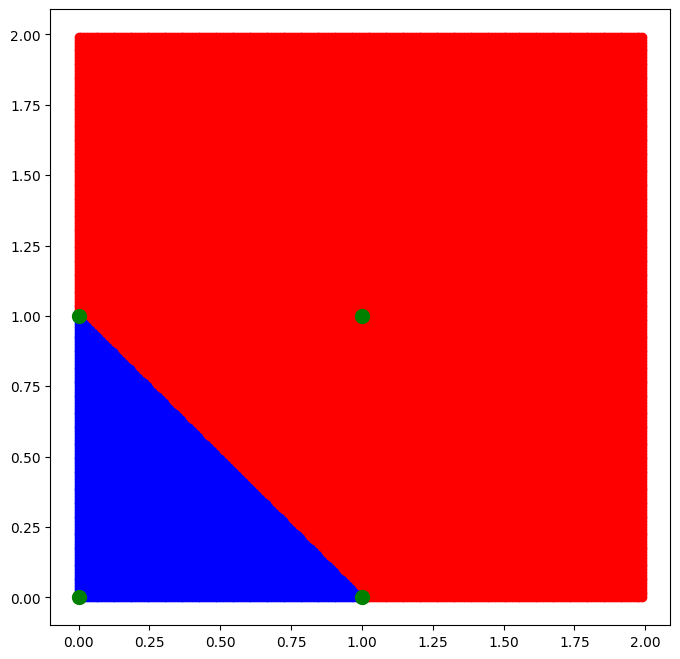

In [251]:
# test one perception that repersents AND gate
def test_one_perception():
    x = 2
    p1 = Perception([x,x], x) 
    nn = [[p1]]

    tests = [(i, j) for i in np.arange(0, x, 0.01) for j in np.arange(0, x, 0.01)]
    out = run_tests(nn, tests)

    vi = Visualizer()
    vi.plot(tests, out)

test_one_perception()


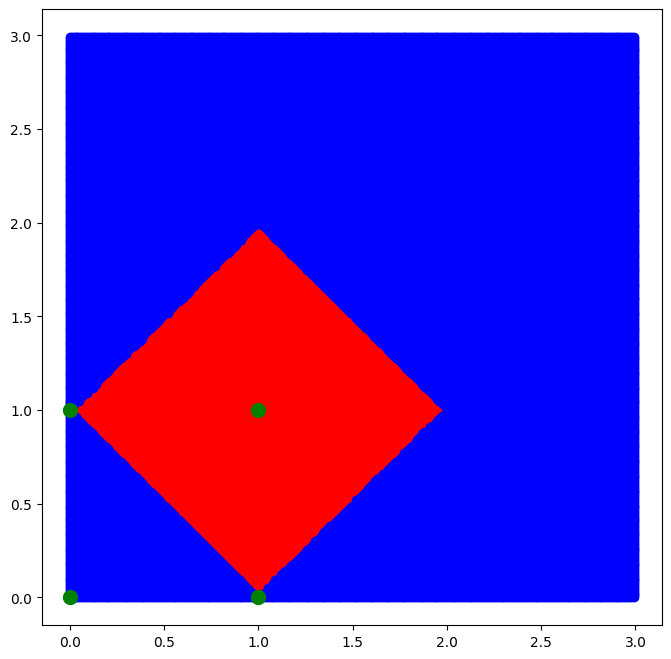

In [252]:
# test wether a point is in the squre
def test_squre():
    # six perceptions in the first layer + one perception in the second layer
    x = 3
    nn_l1 = [Perception([x,x], x), 
              Perception([-x,x], -x), 
              Perception([x,-x], -x), 
              Perception([-x,-x], -3*x), 
            ]

    nn_l2 = [Perception([x,x,x,x],4*x)]
    nn = [nn_l1, nn_l2]

    tests = [(i, j) for i in np.arange(0, x, 0.01) for j in np.arange(0, x, 0.01)]
    #tests = [(2, 2), (10,10)]
    out = run_tests(nn, tests)

    vi = Visualizer()
    vi.plot(tests, out)

test_squre()

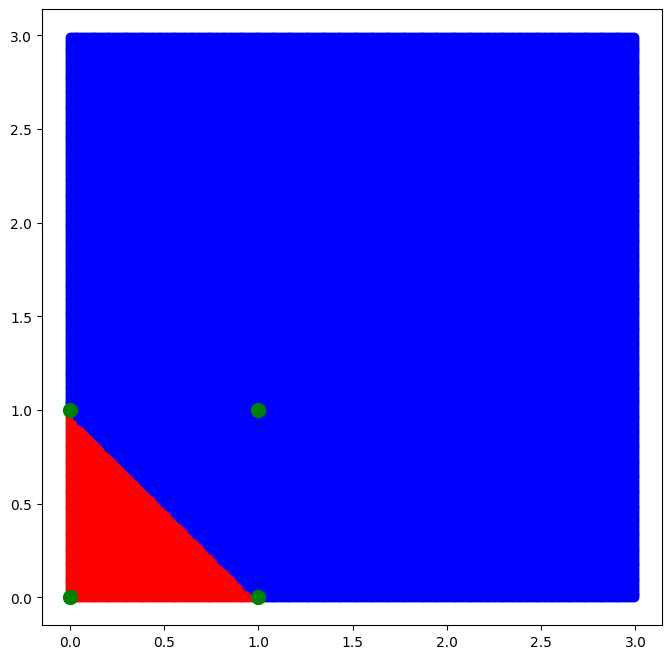

In [253]:
def test_triangle():
    # six perceptions in the first layer + one perception in the second layer
    x = 3
    # triangle
    nn_l1 = [Perception([x,0], 0), 
              Perception([-x,-x], -x), 
              Perception([0,x], 0), 
            ]

    nn_l2 = [Perception([x,x,x],3*x)]
    nn = [nn_l1, nn_l2]

    tests = [(i, j) for i in np.arange(0, x, 0.01) for j in np.arange(0, x, 0.01)]
    #tests = [(2, 2), (10,10)]
    out = run_tests(nn, tests)

    vi = Visualizer()
    vi.plot(tests, out)

test_triangle()

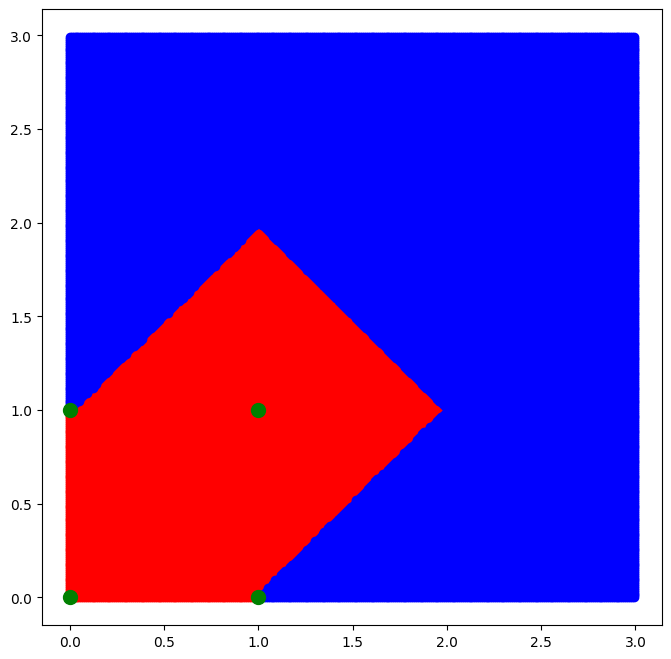

In [254]:
# combine triangle and squre
def test_wired():
    # sqaure
    x = 3
    s_nn_l1 = [Perception([x,x], x), 
              Perception([-x,x], -x), 
              Perception([x,-x], -x), 
              Perception([-x,-x], -3*x), 
            ]

    # triangle
    t_nn_l1 = [Perception([x,0], 0), 
              Perception([-x,-x], -x), 
              Perception([0,x], 0), 
            ]
    # build nn
    # 1st layer: 7 [4 square neurons + 3 triangle neurons]
    nn_l1 = s_nn_l1  + t_nn_l1 

    # 2nd layer: 2 [1 square neuron + 1 triangle neuron]
    nn_l2 = [
        Perception([x, x, x, x, 0, 0, 0],4*x),  # square, so we set the weight of the triangle neurons to 0
        Perception([0, 0, 0, 0, x, x, x],3*x)   # triangle, same as above
    ]

    # 3rd layer: 1 OR
    nn_l3 = [Perception([x,x], x)] 
    nn = [nn_l1, nn_l2, nn_l3]

    # test
    tests = [(i, j) for i in np.arange(0, x, 0.01) for j in np.arange(0, x, 0.01)]
    out = run_tests(nn, tests)

    vi = Visualizer()
    vi.plot(tests, out)

test_wired()

## Generate a continuous value regression
![title](asserts/mlp_continus_regression.png)

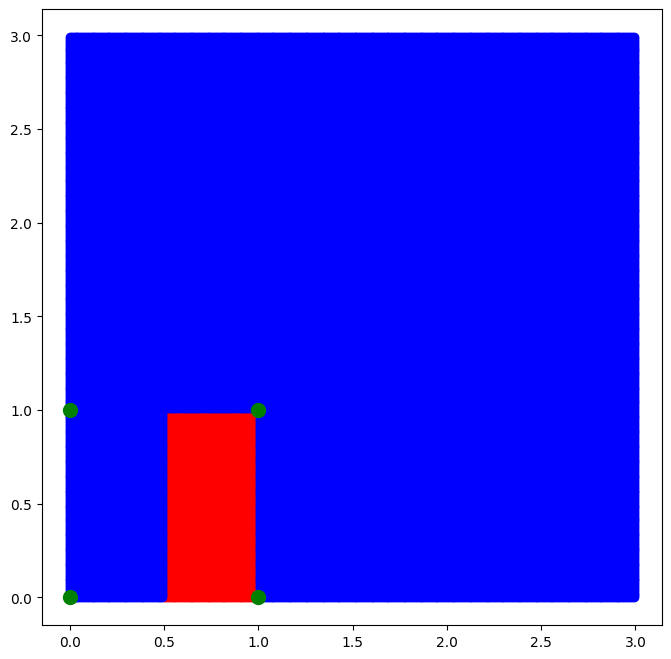

In [255]:
# 3 unit MLP
def test_one_pulse():
    # form a pulse shape
    x = 3
    nn_l1 = [Perception([-x,0], -x), 
              Perception([0,-x], -x), 
              Perception([0,0], 0), 
            ]

    nn_l2 = [Perception([x,x,x],3*x)]
    nn = [nn_l1, nn_l2]

    tests = [(i, j) for i in np.arange(0, x, 0.01) for j in np.arange(0, x, 0.01)]
    #tests = [(2, 2), (10,10)]
    out = run_tests(nn, tests)

    vi = Visualizer()
    vi.plot(tests, out)

def test_shifted_one_pulse():
    # form a pulse shape
    x = 3
    nn_l1 = [Perception([2 * x,0], x), 
              Perception([0,-x], -x), 
              Perception([0,0], 0), 
            ]

    nn_l2 = [Perception([x,x,x],3*x)]
    nn = [nn_l1, nn_l2]

    tests = [(i, j) for i in np.arange(0, x, 0.01) for j in np.arange(0, x, 0.01)]
    #tests = [(2, 2), (10,10)]
    out = run_tests(nn, tests)

    vi = Visualizer()
    vi.plot(tests, out)

def test_pulse():
    x = 3
    p_nn_l1 = [Perception([-x,0], -x), 
              Perception([0,-x], -x), 
              Perception([0,0], 0), 
            ]

    s_nn_l1 = [Perception([2 * x,0], x), 
              Perception([0,-x], -x), 
              Perception([0,0], 0), 
            ]

    nn_l1 = p_nn_l1 + s_nn_l1
    nn_l2 = [Perception([x, x, x, 0, 0, 0],3*x),
             Perception([0, 0, 0, x, x, x],3*x),
             ]
    nn_l3 = [Perception([x,x], 2*x)]
    nn = [nn_l1, nn_l2, nn_l3]

    tests = [(i, j) for i in np.arange(0, x, 0.01) for j in np.arange(0, x, 0.01)]
    out = run_tests(nn, tests)
    vi = Visualizer()
    vi.plot(tests, out)

test_pulse()